<a href="https://colab.research.google.com/github/Jom123410/280222/blob/master/Cyber_Security_Breaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyber Security Data Breaches Analysis
### Capstone Project

# Dataset 1
Dataset 1 is a comprehensive collection of data breaches, encompassing various aspects of cybersecurity incidents. It includes critical information such as the entity affected, the year of the breach, the number of records compromised, the type of organization involved, and the method of breach. This dataset provides a detailed insight into the patterns and trends of cybersecurity breaches over time, offering valuable information for analysis and understanding of the cybersecurity landscape.

## Key Features of Dataset 1:

####Data Overview:
Loaded from a CSV file, the dataset presents the first five rows to give an initial understanding of the data structure.

####Data Cleaning and Preprocessing:
 Involves checking for null values, dropping irrelevant columns (like 'Sources'), and renaming columns for clarity.

####Data Transformation:
 Includes converting the 'Year' column to an integer type and cleaning the 'Records' column to maintain consistency in data format.

####Data Analysis and Visualization:
 Focuses on exploring the data through various visualizations such as count plots and histograms, highlighting the frequency and distribution of data breaches across years, methods, and organization types.

In [16]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [17]:
# Loading the first dataset
df = pd.read_csv("/content/Cyber Security Data Breaches.csv")

In [18]:
# Displaying the first five rows for an overview
df.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [19]:
# Checking the shape (rows and columns) of the dataset
df.shape

(352, 7)

In [20]:
# Checking the data types of each column
df.dtypes

Unnamed: 0            int64
Entity               object
Year                 object
Records              object
Organization type    object
Method               object
Sources              object
dtype: object

In [21]:
# Dropping the 'Sources' column as it's not needed for analysis
if 'Sources' in df.columns:
    df.drop(['Sources'], axis=1, inplace=True)


In [22]:
# Checking for any null values in the dataset
df.isnull().any()

Unnamed: 0           False
Entity               False
Year                 False
Records               True
Organization type    False
Method                True
dtype: bool

In [23]:
# Summarizing the count of null values in each column
df.isnull().sum()

Unnamed: 0           0
Entity               0
Year                 0
Records              2
Organization type    0
Method               1
dtype: int64

In [24]:
# Renaming columns for clarity and consistency
df.columns = ['id', 'Entity', 'Year', 'Records', 'Organization type', 'Method']


In [25]:
# Displaying the first ten rows with new column names
df.head(10)

,id,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security
5,5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media
6,6,AerServ (subsidiary of InMobi),2018,75000,advertising,hacked
7,7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media
8,8,Airtel,2019,320000000,telecommunications,poor security
9,9,Air Canada,2018,20000,transport,hacked


In [26]:
# Counting and displaying occurrences of each year in the dataset
table_year_df = df['Year'].value_counts()
table_year_df

2011             34
2020             31
2019             30
2015             28
2013             28
2018             26
2014             25
2012             23
2016             22
2010             19
2008             16
2021             13
2009             13
2007             12
2017              9
2006              7
2005              6
2022              5
2004              2
2019-2020         1
2018-2019         1
2014 and 2015     1
Name: Year, dtype: int64

In [27]:
# Converting 'Year' to string, slicing to get the year part and converting back to integer
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str[:4]
df['Year'] = df['Year'].astype(int)

In [28]:
# Checking data types after conversion
df.dtypes

id                    int64
Entity               object
Year                  int64
Records              object
Organization type    object
Method               object
dtype: object

In [29]:
# Counting the number of occurrences for each year in the dataframe
table_year_df = df['Year'].value_counts()
table_year_df

2011    34
2019    31
2020    31
2015    28
2013    28
2018    27
2014    26
2012    23
2016    22
2010    19
2008    16
2021    13
2009    13
2007    12
2017     9
2006     7
2005     6
2022     5
2004     2
Name: Year, dtype: int64

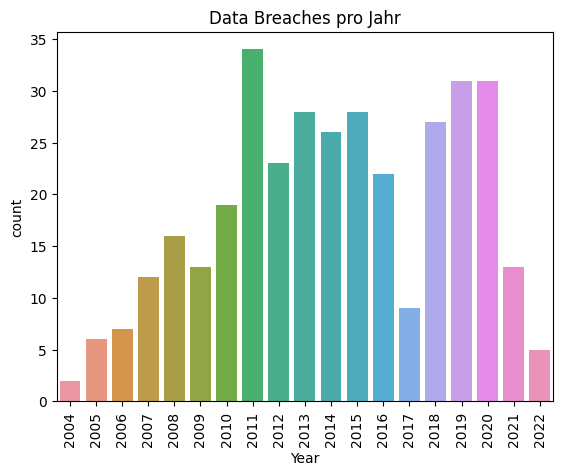

In [30]:
# Visualizing the count of data breaches per year
sns.countplot(x='Year', data=df);
plt.title('Data Breaches pro Jahr')
plt.xticks(rotation=90);

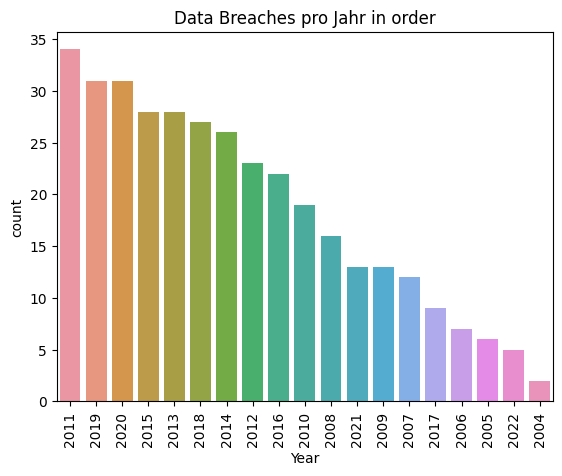

In [31]:
# Plotting a count plot for the number of data breaches per year, ordered by frequency
sns.countplot(x='Year', data=df, order=table_year_df.index.values);
plt.title('Data Breaches pro Jahr in order')
plt.xticks(rotation=90);

In [32]:
# Counting the number of occurrences for each method of breach in the dataframe
table1 = df['Method'].value_counts()
table1

hacked                                                  192
poor security                                            43
lost / stolen media                                      33
accidentally published                                   21
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
misconfiguration/poor security                            1
unprotected api                         

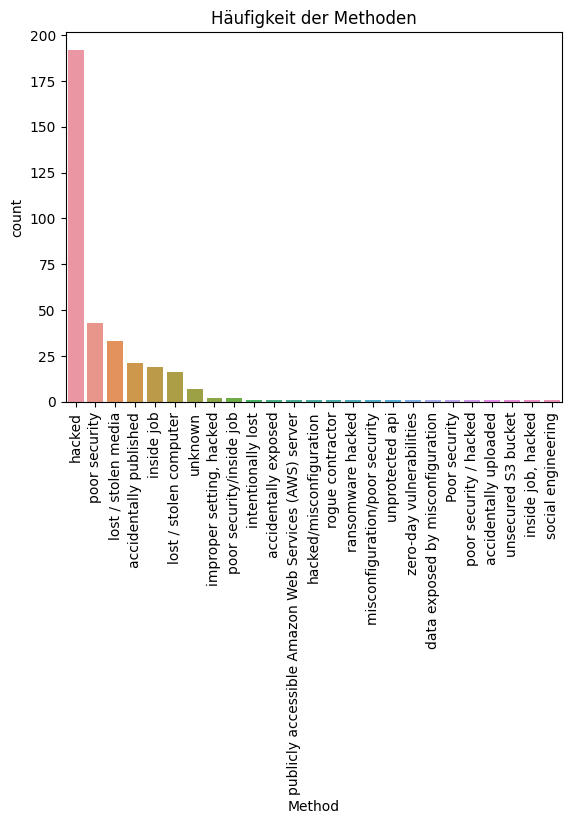

In [33]:
# Plotting a count plot for the frequency of each method of data breach
sns.countplot(x='Method', data=df, order = table1.index.values);
plt.title('Häufigkeit der Methoden')
plt.xticks(rotation=90);

In [34]:
# Filtering out records where the method of breach is not 'hacked'
df_nothacked = df.loc[df['Method'] != 'hacked']
df_nothacked.head()

,id,Entity,Year,Records,Organization type,Method
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
4,4,Adobe Inc.,2019,7500000,tech,poor security
5,5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media
7,7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media
8,8,Airtel,2019,320000000,telecommunications,poor security


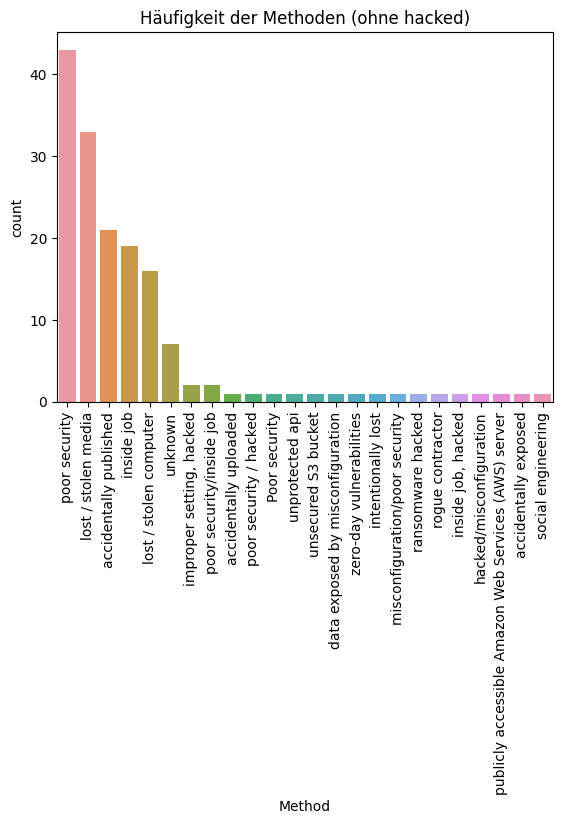

In [35]:
# Plotting a count plot for methods of data breach excluding 'hacked'
sns.countplot(x='Method', data=df_nothacked, order = df_nothacked['Method'].value_counts().index);
plt.title('Häufigkeit der Methoden (ohne hacked)')
plt.xticks(rotation=90);

In [36]:
# Counting the number of occurrences for each type of organization in the dataframe
table2 = df['Organization type'].value_counts()
table2.head(23)

web                       53
healthcare                47
financial                 38
government                30
retail                    27
tech                      19
academic                  13
telecoms                  12
gaming                    12
social network             8
hotel                      8
transport                  7
military                   7
energy                     4
restaurant                 3
media                      3
mobile carrier             2
social media               2
government, military       2
telecom                    2
tech, retail               2
government, healthcare     2
telecommunications         2
Name: Organization type, dtype: int64

In [37]:
# Creating a series with counts of each organization type
org_counts = df['Organization type'].value_counts().rename('org_counts')
# Merging the organization counts back into the original dataframe
df_org = df.merge(org_counts.to_frame(),
                                left_on='Organization type',
                                right_index=True)

In [38]:
# Displaying the top counts of organization types
org_counts.head()

web           53
healthcare    47
financial     38
government    30
retail        27
Name: org_counts, dtype: int64

In [39]:
# Displaying the head of the merged dataframe
df_org.head()

,id,Entity,Year,Records,Organization type,Method,org_counts
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,47
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,47
5,5,Advocate Medical Group,2017,4000000,healthcare,lost / stolen media,47
7,7,"Affinity Health Plan, Inc.",2013,344579,healthcare,lost / stolen media,47
14,14,"Ankle & Foot Center of Tampa Bay, Inc.",2021,156000,healthcare,hacked,47


In [40]:
# Filtering organizations with more than 2 breaches
df_org_upper = df_org[df_org.org_counts > 2]

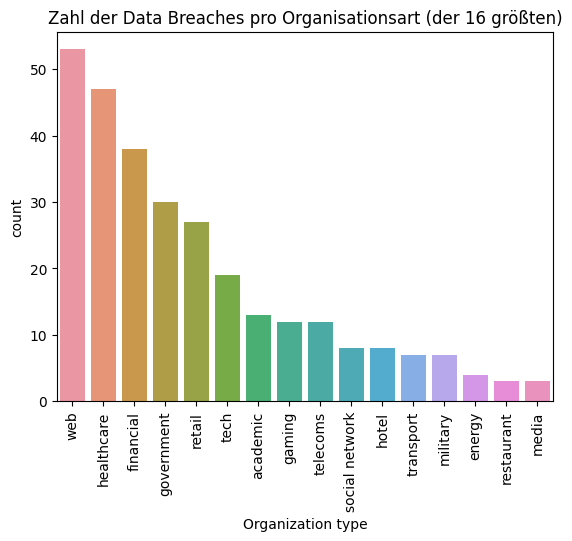

In [41]:
# Plotting a count plot of organization types with more than 2 breaches
sns.countplot(x='Organization type', data=df_org_upper, order = df_org_upper['Organization type'].value_counts().index);
plt.title('Zahl der Data Breaches pro Organisationsart (der 16 größten)')
plt.xticks(rotation=90);

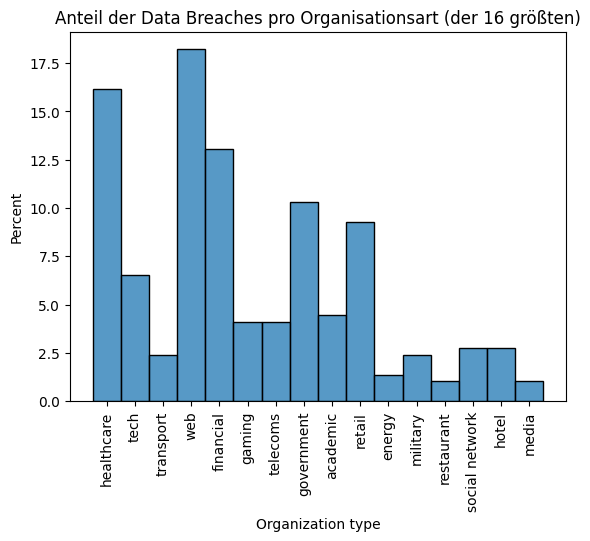

In [42]:
# Plotting a histogram plot showing the percentage of breaches per organization type
sns.histplot(x='Organization type', stat='percent', data=df_org_upper);
plt.title('Anteil der Data Breaches pro Organisationsart (der 16 größten)')
plt.xticks(rotation=90);

In [43]:
# Cleaning the 'Records' column in the dataframe by removing rows with specific text values
# (The following lines are repeated for different text values to be removed)
df_cleaned_records = df.drop(df[df.Records == 'unknown'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'G20 world leaders'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'tens of thousands'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '19 years of data'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '63 stores'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'over 5,000,000'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'unknown (client list)'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'millions'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '235 GB'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '350 clients emails'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '9,000,000 (approx) - basic booking, 2208 (credit card details)'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'Unknown'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '2.5GB'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '250 locations'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '500 locations'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '54 locations'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '51 locations'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '10 locations'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '8 locations'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '93 stores'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '200 stores'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'undisclosed'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'Source Code Compromised'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == '100 terabytes'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'TBC'].index, inplace=True)
df_cleaned_records = df.drop(df[df.Records == 'unknown'].index, inplace=True)
# Dropping rows with NaN values in the 'Records' column
df_cleaned_records = df.dropna(subset=['Records'])

In [44]:
# Checking the shape of the cleaned dataframe
df_cleaned_records.shape

(305, 6)

In [45]:
# Converting the 'Records' column to a float type
df_cleaned_records['Records'] = df_cleaned_records['Records'].astype(float)

<ipython-input-45-1eaf0ed3d5fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_records['Records'] = df_cleaned_records['Records'].astype(float)


In [46]:
# Grouping data by 'Year' and summing the 'Records' for each year
df_total_records = df_cleaned_records.groupby('Year', sort=False)["Records"].sum().reset_index(name ='Total Records')

In [47]:
# Displaying the total records dataframe
df_total_records

,Year,Total Records
0,2016,5.405824e+08
1,2020,1.251422e+09
2,2013,3.469435e+09
3,2019,3.824901e+09
4,2017,2.547669e+08
5,2018,1.531850e+09
6,2005,4.682500e+07
7,2021,6.139627e+07
8,2015,2.016545e+08
9,2004,9.251000e+07


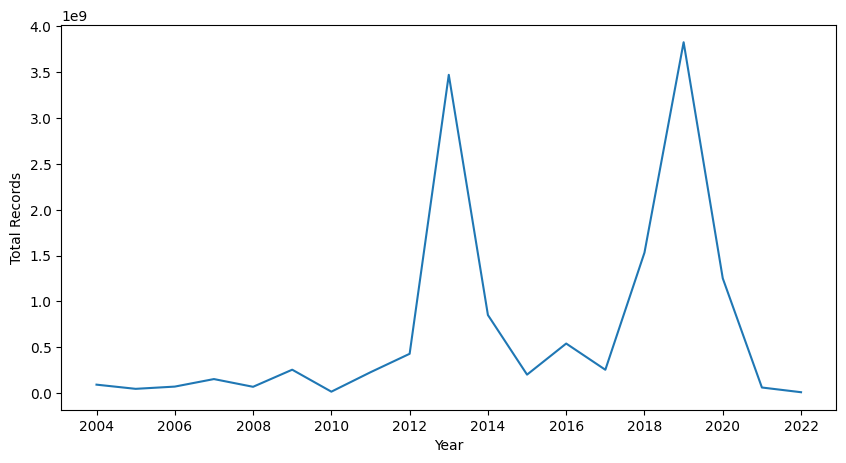

In [48]:
# Plotting a line plot showing the total number of records breached each year
plt.figure(figsize=(10,5))
sns.lineplot(data=df_total_records, x='Year', y='Total Records')
plt.xticks([2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022]);

In [49]:
# Grouping and summing records by organization type, then resetting the index
df_total_records_org = df_cleaned_records.groupby('Organization type', sort=False)["Records"].sum().reset_index(name ='Total Records')

In [50]:
# Sorting the total records by organization type in descending order and resetting the index
df_total_records_org = df_total_records_org.sort_values('Total Records', ascending=False, ignore_index=True)

# Keeping only the top 20 organization types based on total records
df_total_records_org_clean = df_total_records_org.drop(df_total_records_org.index[21:])

In [51]:
# Displaying the cleaned total records by organization type
df_total_records_org_clean

,Organization type,Total Records
0,web,5.203696e+09
1,social network,1.238000e+09
2,tech,1.000898e+09
3,financial service company,8.850000e+08
4,financial,8.185971e+08
5,hotel,5.055630e+08
6,telecommunications,4.200000e+08
7,retail,3.721407e+08
8,data broker,3.400000e+08
9,Telephone directory,2.990550e+08


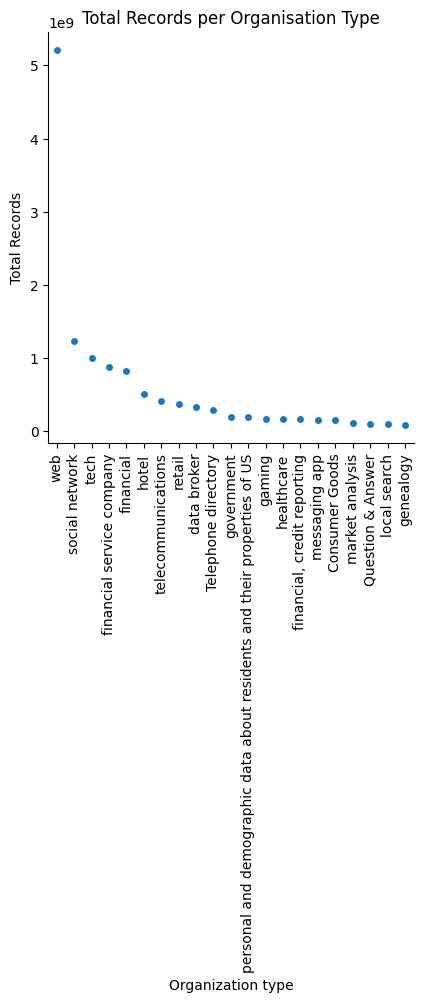

In [52]:
# Creating a categorical plot to visualize total records breached per organization type
sns.catplot(data=df_total_records_org_clean, x='Organization type', y='Total Records')
plt.title('Total Records per Organisation Type')
plt.xticks(rotation=90);

In [53]:
# Removing the first row from the cleaned dataframe to exclude a specific category
df_total_records_org_clean = df_total_records_org_clean.drop(df_total_records_org_clean.index[:1])

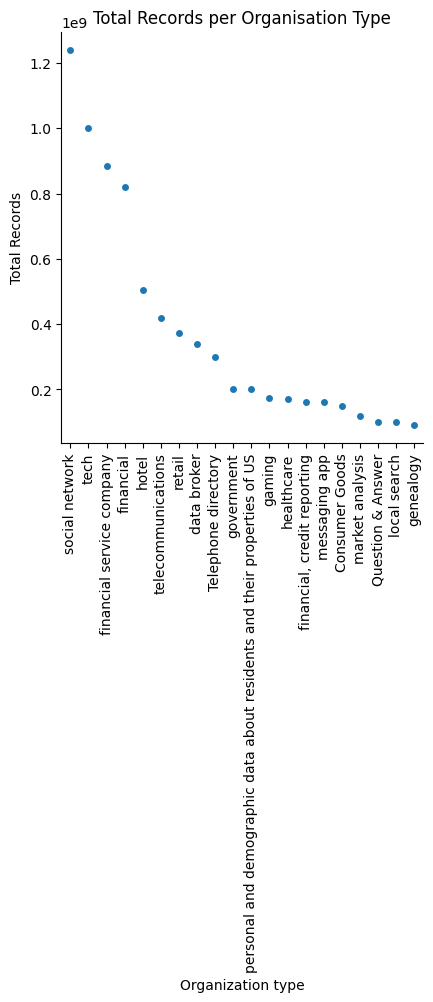

In [54]:
# Creating another categorical plot without the excluded category
sns.catplot(data=df_total_records_org_clean, x='Organization type', y='Total Records')
plt.title('Total Records per Organisation Type')
plt.xticks(rotation=90);

In [55]:
# Grouping and summing records by breach method, then sorting and cleaning the data
df_total_records_Method = df_cleaned_records.groupby('Method', sort=False)["Records"].sum().reset_index(name ='Total Records')

In [56]:
df_total_records_Method = df_total_records_Method.sort_values('Total Records', ascending=False, ignore_index=True)
df_total_records_Method_clean = df_total_records_Method.drop(df_total_records_Method.index[21:])
df_total_records_Method_clean

,Method,Total Records
0,hacked,7.404780e+09
1,poor security,3.610143e+09
2,unknown,4.482339e+08
3,poor security / hacked,4.122143e+08
4,accidentally published,2.699175e+08
5,data exposed by misconfiguration,2.500000e+08
6,Poor security,2.010000e+08
7,lost / stolen media,1.704345e+08
8,unsecured S3 bucket,1.060000e+08
9,unprotected api,1.000000e+08


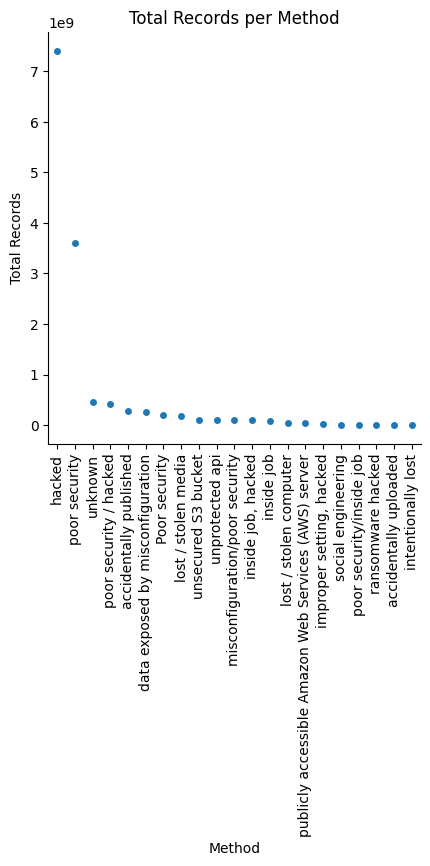

In [58]:
# Creating a categorical plot to visualize total records breached by method
sns.catplot(data=df_total_records_Method_clean, x='Method', y='Total Records')
plt.title('Total Records per Method')
plt.xticks(rotation=90);

In [64]:
# Counting the occurrences of each breach method and renaming the series
Method_counts = df['Method'].value_counts().rename('Method_counts')

# Merging the method counts with the total records by method dataframe
df_Method = df_total_records_Method_clean.merge(Method_counts.to_frame(),
                                left_on='Method',
                                right_index=True)

In [66]:
# Merging the method counts with the total records by method dataframe
df_Method['relative'] = df_Method['Total Records']/df_Method['Method_counts']

In [68]:
# Calculating the relative amount of records per method count
df_Method = df_Method.sort_values('relative', ascending=False, ignore_index=True)

In [69]:
df_Method

,Method,Total Records,Method_counts,relative
0,poor security / hacked,4.122143e+08,1,4.122143e+08
1,data exposed by misconfiguration,2.500000e+08,1,2.500000e+08
2,Poor security,2.010000e+08,1,2.010000e+08
3,unsecured S3 bucket,1.060000e+08,1,1.060000e+08
4,misconfiguration/poor security,1.000000e+08,1,1.000000e+08
5,unprotected api,1.000000e+08,1,1.000000e+08
6,poor security,3.610143e+09,39,9.256777e+07
7,"inside job, hacked",9.200000e+07,1,9.200000e+07
8,unknown,4.482339e+08,5,8.964678e+07
9,hacked,7.404780e+09,160,4.627988e+07


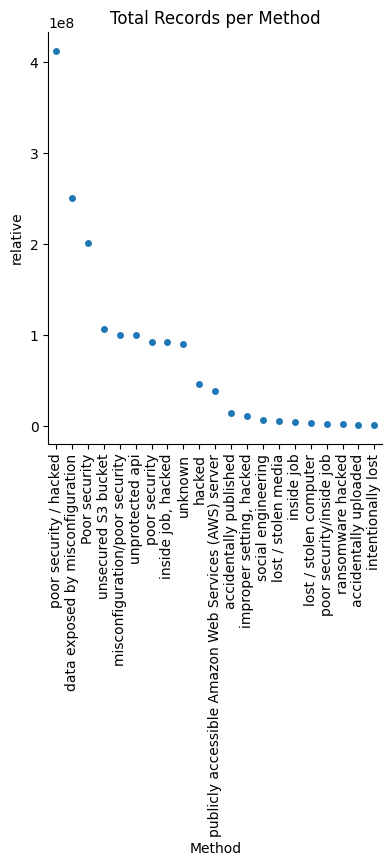

In [70]:
# Creating a categorical plot to visualize the relative amount of records per method
sns.catplot(data=df_Method, x='Method', y='relative')
plt.title('Total Records per Method')
plt.xticks(rotation=90);

In [71]:
# Copying the original dataframe for heatmap analysis
df_heatmap = df.copy(deep=True)

In [72]:
# Encoding categorical data in the heatmap dataframe
le = LabelEncoder()
df_heatmap['Records'] = le.fit_transform(df_heatmap['Records'])
df_heatmap['Entity'] = le.fit_transform(df_heatmap['Entity'])
df_heatmap['Organization type'] = le.fit_transform(df_heatmap['Organization type'])
df_heatmap['Method'] = le.fit_transform(df_heatmap['Method'])

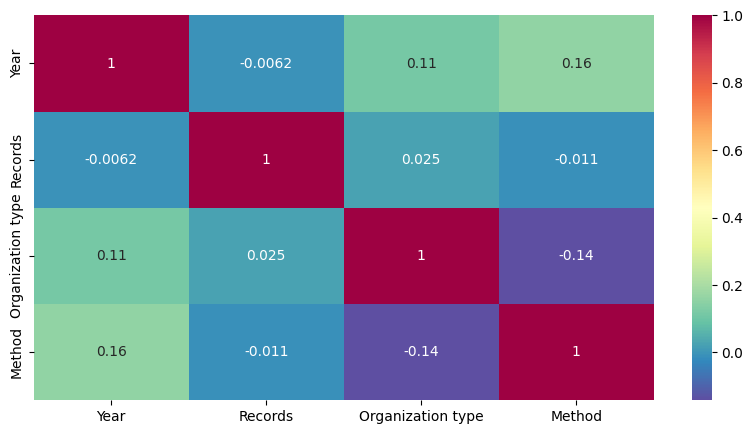

In [73]:
# Plotting a heatmap to show correlations between various numeric features
plt.figure(figsize=(10,5))
sns.heatmap(df_heatmap[['Year', 'Records', 'Organization type', 'Method']].corr(), cmap='Spectral_r', annot=True);

#Dataset 2
Dataset 2, another significant dataset on cybersecurity breaches, is loaded separately. It extends the exploration into the realm of cybersecurity incidents, offering a different perspective with additional variables such as the state of the breach, individuals affected, and the type of breach.

##Key Features of Dataset 2:

####Data Exploration:
Similar to Dataset 1, it begins with loading the data, examining the first few rows, and understanding the structure and types of data available.

####Column Management:
 The dataset undergoes a process of dropping unnecessary columns and renaming others for better clarity and data handling.

####Null Value Analysis:
 Identifies and counts missing values in each column, crucial for accurate data analysis.

####Advanced Data Analysis:
The dataset is analyzed for trends in breaches over years, types of breaches, and the impact on individuals affected. It includes scatter plots, histograms, and count plots to visually represent the data.

####Heatmap for Correlation:
 A heatmap is used to understand the relationships and correlations between different numeric features in the dataset, employing encoding techniques for categorical data.

In [74]:
# Dataset 2: Loading a different cybersecurity breaches dataset
df2 = pd.read_csv("/content/Cyber Security Breaches.csv")

In [75]:
# Displaying the first few rows of the new dataset
df2.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [76]:
# Renaming columns of the second dataset for better clarity and consistency
df2.columns = ['id', 'Number', 'Entity', 'State', 'Business_Associate_Involved', 'Individuals_Affected', 'Date_of_Breach',
               'Type_of_Breach', 'Location_of_Breached_Information', 'Date_Posted_or_Updated', 'Summary', 'breach_start',
               'breach_end', 'year']

In [77]:
# Checking the shape (number of rows and columns) of the new dataset
df2.shape

(1055, 14)

In [78]:
# Checking the data types of each column in the new dataset
df2.dtypes

id                                   int64
Number                               int64
Entity                              object
State                               object
Business_Associate_Involved         object
Individuals_Affected                 int64
Date_of_Breach                      object
Type_of_Breach                      object
Location_of_Breached_Information    object
Date_Posted_or_Updated              object
Summary                             object
breach_start                        object
breach_end                          object
year                                 int64
dtype: object

In [86]:
# Counting the number of missing values in each column of the new dataset
df2.isnull().sum()

id                                  0
Entity                              0
State                               0
Individuals_Affected                0
Date_of_Breach                      0
Type_of_Breach                      0
Location_of_Breached_Information    0
year                                0
dtype: int64

In [93]:
# Displaying the first few rows of the new dataset after renaming columns
df2.head()

,id,Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,year
0,1,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2009
1,2,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2009
2,3,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2009
3,4,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2009
4,5,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2009


In [95]:
columns_to_drop = ['Number', 'Summary', 'Date_Posted_or_Updated', 'breach_start',
                   'breach_end', 'Business_Associate_Involved']
df2.drop([col for col in columns_to_drop if col in df2.columns], axis=1, inplace=True)


In [97]:
# Displaying the first few rows of the new dataset after dropping some columns
df2.head()

,id,Entity,State,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,year
0,1,Brooke Army Medical Center,TX,1000,10/16/2009,Theft,Paper,2009
1,2,"Mid America Kidney Stone Association, LLC",MO,1000,9/22/2009,Theft,Network Server,2009
2,3,Alaska Department of Health and Social Services,AK,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2009
3,4,Health Services for Children with Special Need...,DC,3800,10/9/2009,Loss,Laptop,2009
4,5,"L. Douglas Carlson, M.D.",CA,5257,9/27/2009,Theft,Desktop Computer,2009


In [98]:
# Displaying information about the new dataset, including the data type of each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                1055 non-null   int64 
 1   Entity                            1055 non-null   object
 2   State                             1055 non-null   object
 3   Individuals_Affected              1055 non-null   int64 
 4   Date_of_Breach                    1055 non-null   object
 5   Type_of_Breach                    1055 non-null   object
 6   Location_of_Breached_Information  1055 non-null   object
 7   year                              1055 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 66.1+ KB


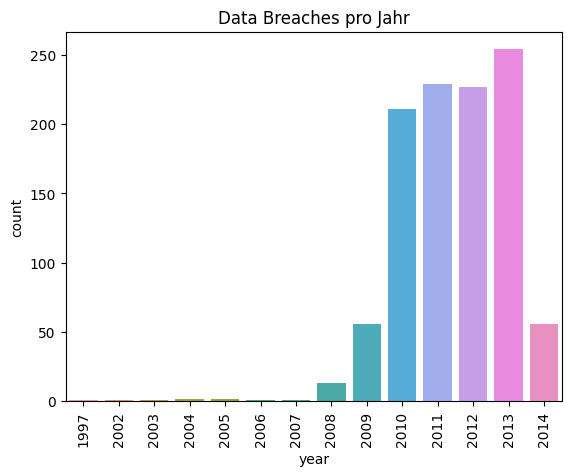

In [99]:
# Plotting a count plot for the number of data breaches per year in the new dataset
sns.countplot(data=df2, x='year');
plt.title('Data Breaches pro Jahr')
plt.xticks(rotation=90);

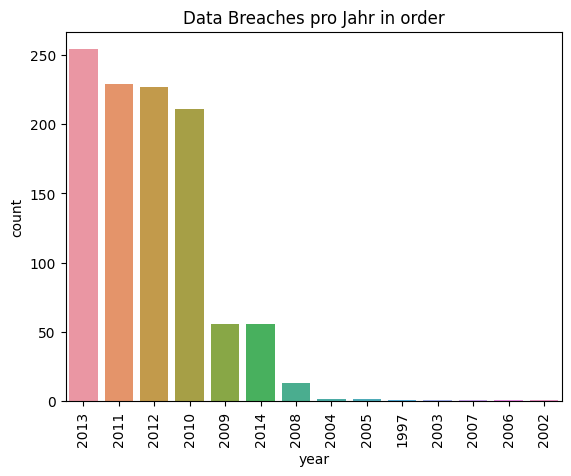

In [100]:
# Plotting a count plot for the number of data breaches per year in the new dataset, ordered by frequency
sns.countplot(data=df2, x='year', order = df2['year'].value_counts().index);
plt.title('Data Breaches pro Jahr in order')
plt.xticks(rotation=90);

In [101]:
# Counting the number of occurrences for each year in the new dataset
table_year_df2 = df2['year'].value_counts()
table_year_df2

2013    254
2011    229
2012    227
2010    211
2009     56
2014     56
2008     13
2004      2
2005      2
1997      1
2003      1
2007      1
2006      1
2002      1
Name: year, dtype: int64

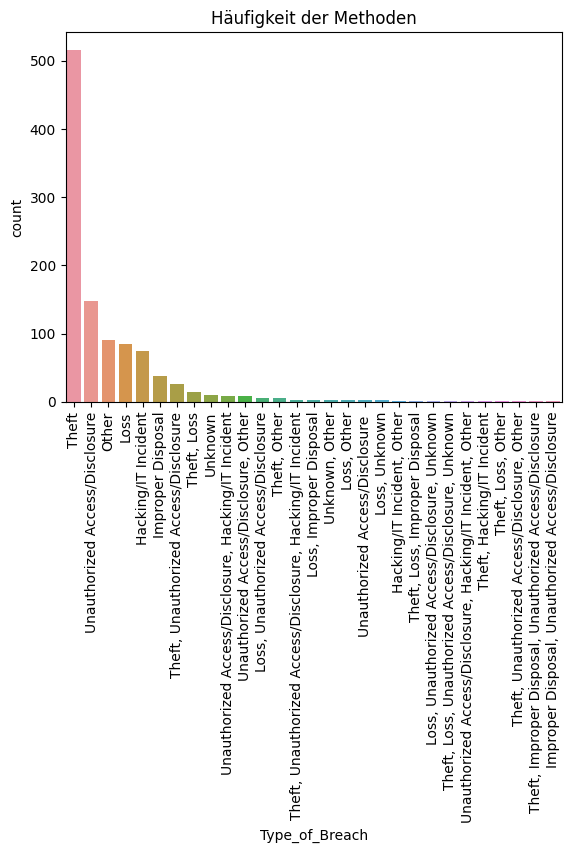

In [102]:
# Plotting a count plot for the frequency of each type of breach in the new dataset
sns.countplot(data=df2, x='Type_of_Breach', order = df2['Type_of_Breach'].value_counts().index);
plt.title('Häufigkeit der Methoden')
plt.xticks(rotation=90);

In [103]:
# Counting the number of occurrences for each type of breach in the new dataset
table3 = df2['Type_of_Breach'].value_counts()
table3.head(14)

Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Loss, Unauthorized Access/Disclosure                            5
Theft, Other                                                    5
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Name: Type_of_Breach, dtype: int64

In [104]:
# Creating a series with counts of each type of breach and renaming the series
Type_of_Breach_counts = df2['Type_of_Breach'].value_counts().rename('Type_of_Breach_counts')
# Merging the type of breach counts back into the original dataframe of the new dataset
df2_Type_of_Breach = df2.merge(Type_of_Breach_counts.to_frame(),
                                left_on='Type_of_Breach',
                                right_index=True)

In [105]:
# Filtering types of breaches with more than 4 occurrences in the new dataset
df2_Type_of_Breach_upper = df2_Type_of_Breach[df2_Type_of_Breach.Type_of_Breach_counts > 4]

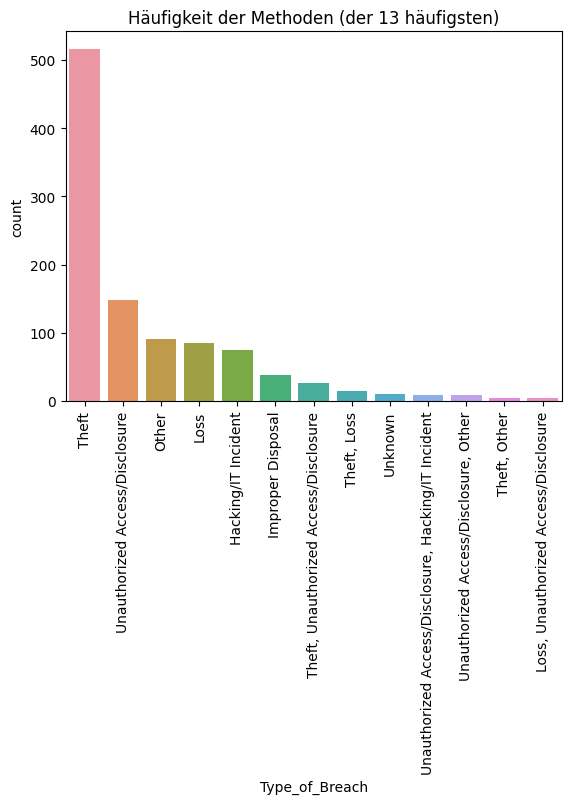

In [106]:
# Plotting a count plot of types of breaches with more than 4 occurrences in the new dataset
sns.countplot(data=df2_Type_of_Breach_upper, x='Type_of_Breach',
              order = df2_Type_of_Breach_upper['Type_of_Breach'].value_counts().index);
plt.title('Häufigkeit der Methoden (der 13 häufigsten)')
plt.xticks(rotation=90);

In [107]:
# Counting the number of occurrences for each state in the new dataset
table4 = df2['State'].value_counts()
table4

CA    113
TX     83
FL     66
NY     58
IL     49
PA     40
IN     40
OH     33
TN     32
NC     32
MA     32
PR     31
GA     30
KY     26
MI     26
MO     25
WA     25
AZ     21
MN     21
NJ     20
CO     18
VA     18
MD     18
CT     17
OR     15
WI     14
SC     13
AL     12
AR     11
NM     10
NE      9
UT      9
DC      9
IA      8
LA      7
RI      7
KS      7
OK      6
WV      5
MS      5
NV      5
AK      5
WY      4
NH      4
MT      4
DE      3
ND      3
ID      2
HI      1
SD      1
ME      1
VT      1
Name: State, dtype: int64

In [108]:
# Creating a series with counts of each state and renaming the series
State_counts = df2['State'].value_counts().rename('State_counts')
# Merging the state counts back into the original dataframe of the new dataset
df2_State = df2.merge(State_counts.to_frame(),
                                left_on='State',
                                right_index=True)

In [109]:
# Filtering states with at least 15 occurrences in the new dataset
df2_State_upper = df2_State[df2_State.State_counts >= 15]

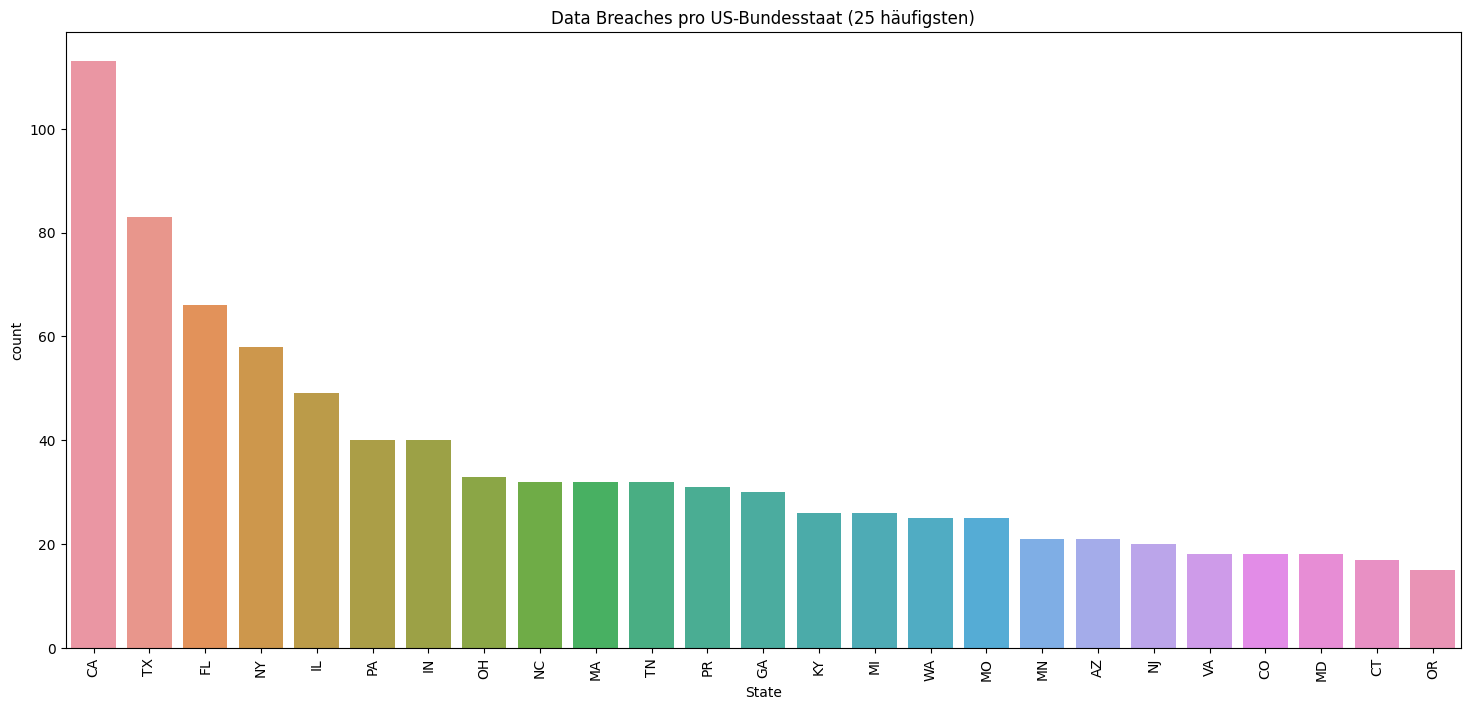

In [110]:
# Plotting a count plot for the number of data breaches per state in the new dataset
plt.figure(figsize=(18,8))
sns.countplot(data=df2_State_upper, x='State', order = df2_State_upper['State'].value_counts().index);
plt.title('Data Breaches pro US-Bundesstaat (25 häufigsten)')
plt.xticks(rotation=90);

In [111]:
# Filtering the dataset to include only the data from the year 2006 and onwards
df2_2006 = df2.loc[df2['year']>2006]

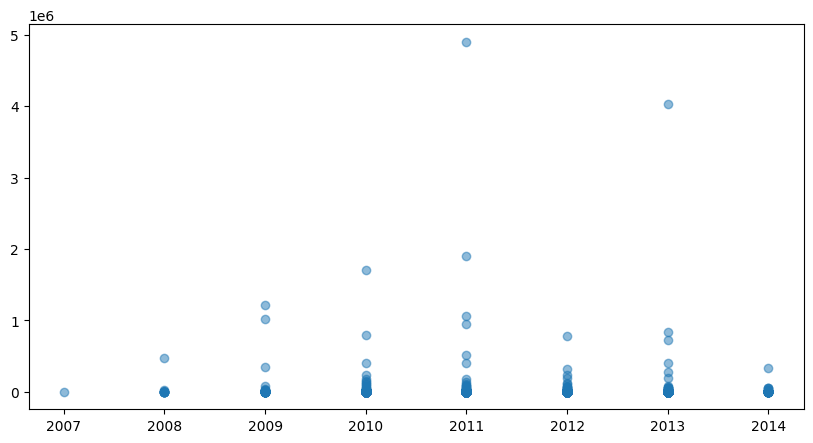

In [112]:
# Plotting a scatter plot to visualize the number of individuals affected by data breaches each year
plt.figure(figsize=(10,5))
plt.scatter(data = df2_2006, y = 'Individuals_Affected', x = 'year', alpha=1/2);

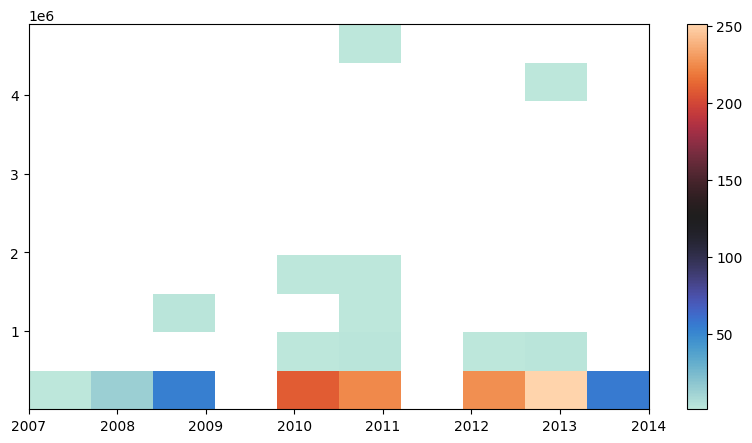

In [113]:
# Plotting a 2D histogram to show the distribution of the number of individuals affected by data breaches over the years
plt.figure(figsize=(10,5))
plt.hist2d(data = df2_2006,  y = 'Individuals_Affected', x = 'year', cmin=0.5, cmap = 'icefire')
plt.colorbar();

In [114]:
# Filtering the dataset to include only the top 11 types of breaches
df2_2006_breach = df2_2006.loc[df2_2006['Type_of_Breach'].isin(df2_2006['Type_of_Breach'].value_counts().index[:11])]

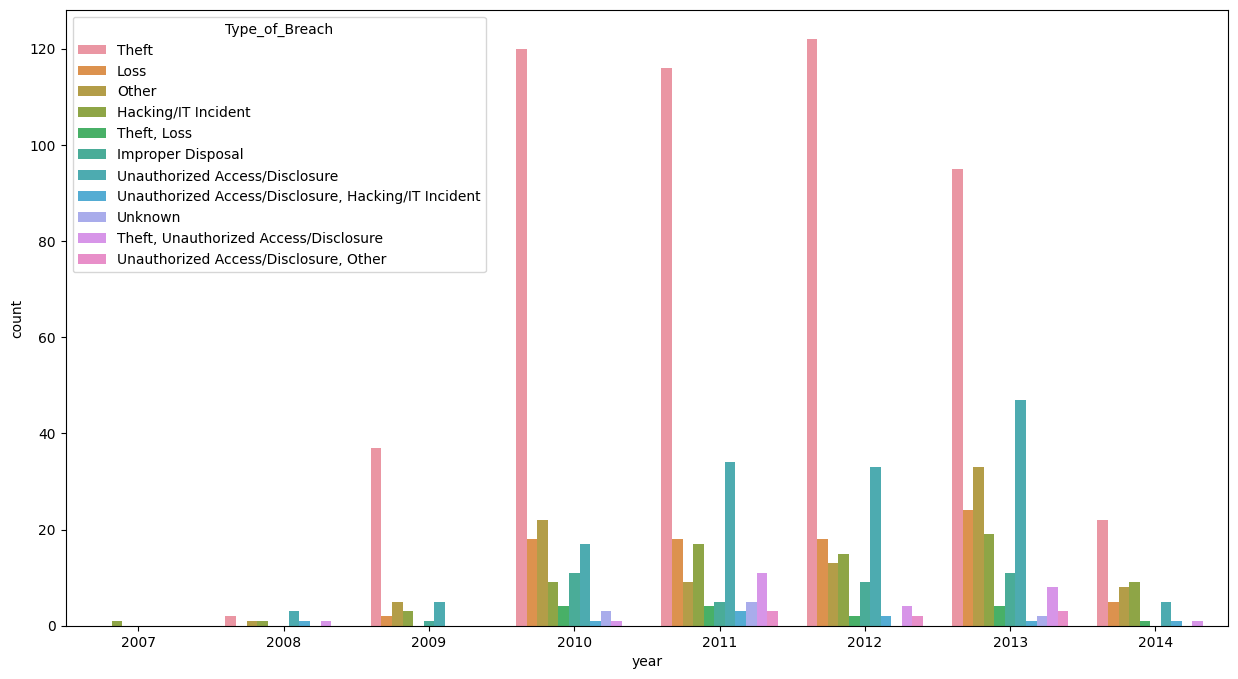

In [115]:
# Plotting a count plot showing the number of breaches of each type per year
plt.figure(figsize=(15,8))
sns.countplot(data = df2_2006_breach, x = 'year', hue = 'Type_of_Breach');

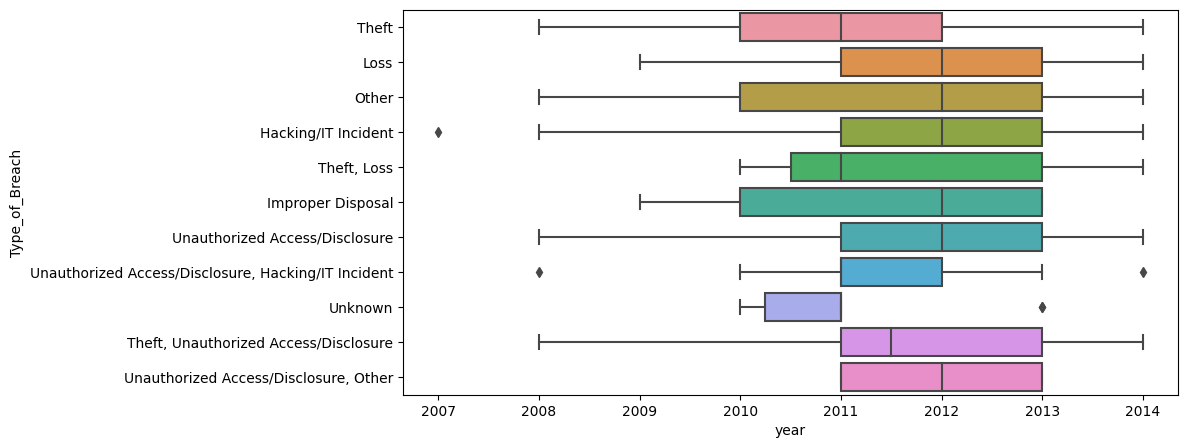

In [116]:
# Plotting a box plot to visualize the distribution of types of breaches over the years
plt.figure(figsize=(10,5))
sns.boxplot(data=df2_2006_breach, y = 'Type_of_Breach', x = 'year');

In [117]:
# Copying the second dataset for heatmap analysis
df2_heatmap = df2.copy(deep=True)

In [118]:
# Encoding categorical data in the heatmap dataframe using LabelEncoder
le = LabelEncoder()

df2_heatmap['State'] = le.fit_transform(df2_heatmap['State'])
df2_heatmap['Date_of_Breach'] = le.fit_transform(df2_heatmap['Date_of_Breach'])
df2_heatmap['Type_of_Breach'] = le.fit_transform(df2_heatmap['Type_of_Breach'])
df2_heatmap['Location_of_Breached_Information'] = le.fit_transform(df2_heatmap['Location_of_Breached_Information'])

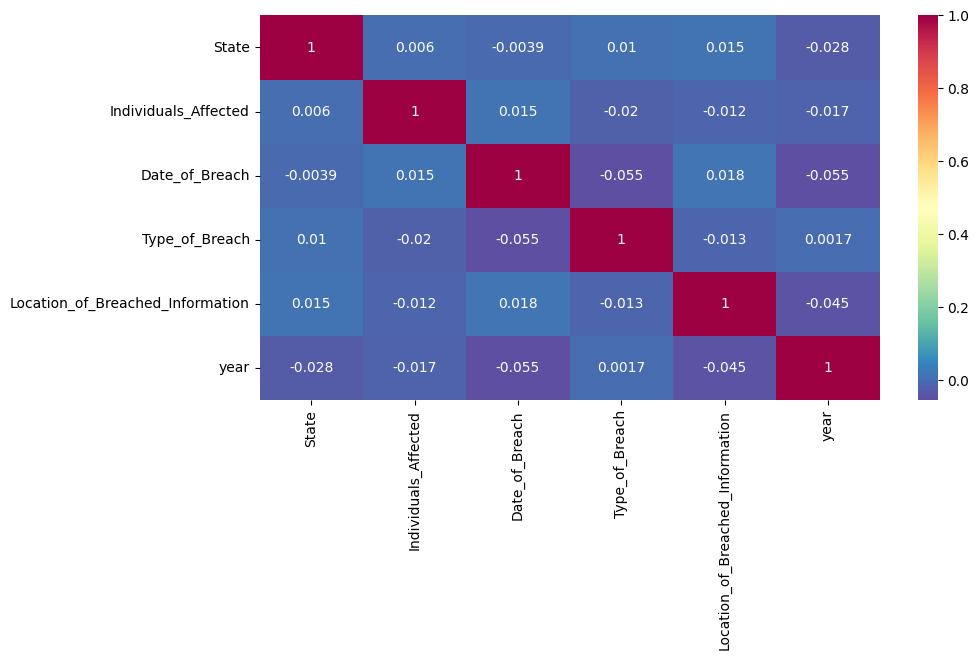

In [119]:
# Visualizing the heatmap to show correlations between various numeric features in the second dataset
plt.figure(figsize=(10,5))
sns.heatmap(df2_heatmap[['State', 'Individuals_Affected', 'Date_of_Breach', 'Type_of_Breach',
                 'Location_of_Breached_Information', 'year']].corr(), cmap='Spectral_r', annot=True);